In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
store = pd.read_csv("store.csv", engine="python") 

In [0]:
train = pd.read_csv('train.csv', engine="python")

In [0]:
test = pd.read_csv('test.csv', engine="python")

In [0]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [0]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0


In [0]:
train.shape

In [0]:
df_merge=pd.merge(store,train, on ="Store")

In [0]:
df_merge.shape

In [0]:
df_merge.dtypes

In [0]:
df_merge.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


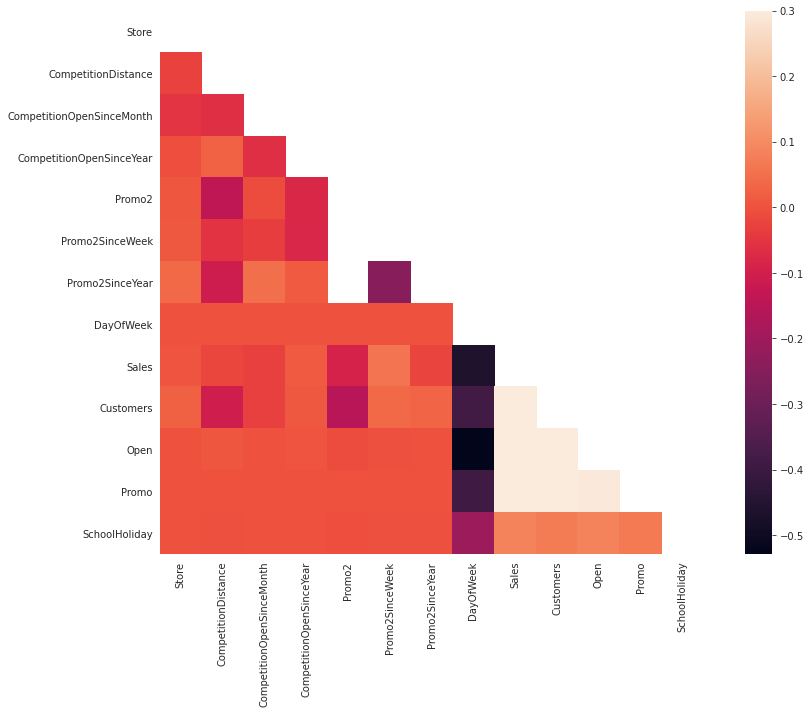

In [0]:
corr=df_merge.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True



with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

Text(0.5, 1.0, 'Mean sales per store when open')

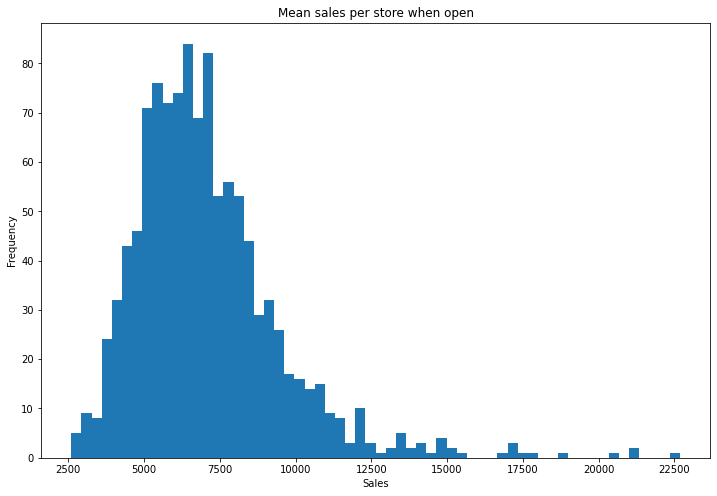

In [0]:
df_merge_store=df_merge[df_merge["Open"]==1].groupby("Store")["Sales"].mean()
plt.figure(figsize=(12, 8))
plt.hist(df_merge_store, bins=60)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Mean sales per store when open")

In [0]:
df_merge["Sales"].describe()

count    55813.000000
mean      6115.434648
std       3754.196751
min          0.000000
25%       4178.000000
50%       6020.000000
75%       8106.000000
max      41551.000000
Name: Sales, dtype: float64

In [0]:
df_merge_store.describe()

count     1115.000000
mean      7078.145695
std       2449.989793
min       2598.930233
25%       5456.511628
50%       6688.883721
75%       8160.767442
max      22685.674419
Name: Sales, dtype: float64

[Text(0.5, 1.0, 'Number of customers per promotion')]

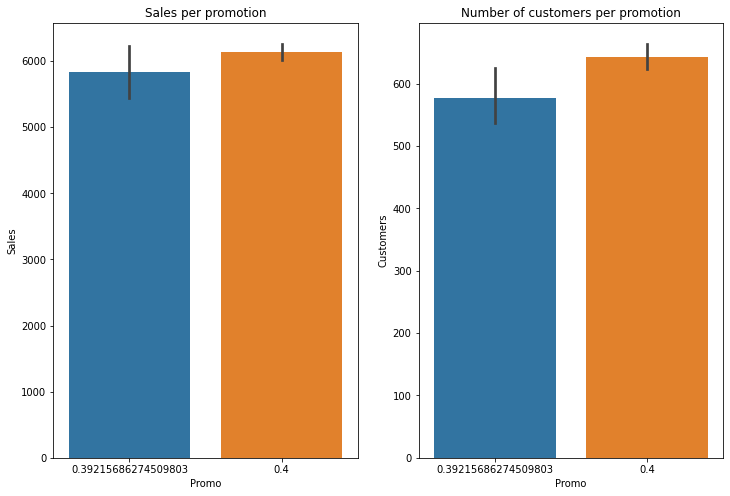

In [0]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
df_merge_Promo2=df_merge.groupby("Store")["Sales","Promo","Customers"].mean()
sns.barplot(df_merge_Promo2["Promo"],df_merge_Promo2["Sales"]).set(title="Sales per promotion")
plt.subplot(1, 2, 2)
sns.barplot(df_merge_Promo2["Promo"],df_merge_Promo2["Customers"]).set(title="Number of customers per promotion")


[Text(0.5, 1.0, "Mean sales by store type by assortment'")]

<Figure size 864x576 with 0 Axes>

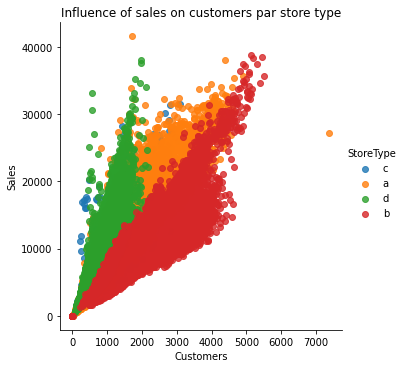

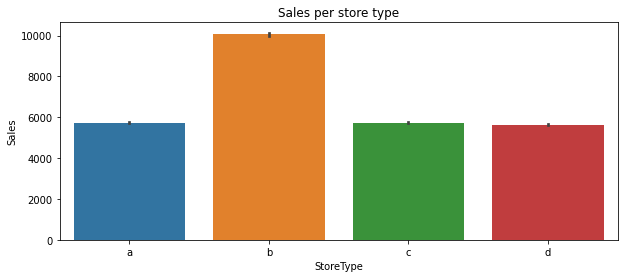

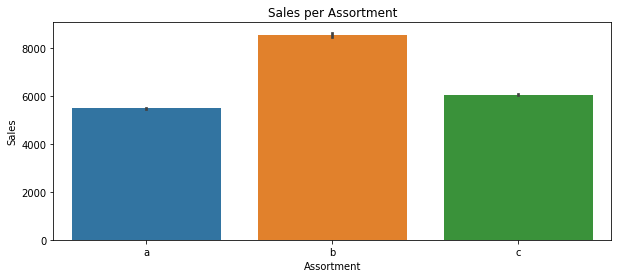

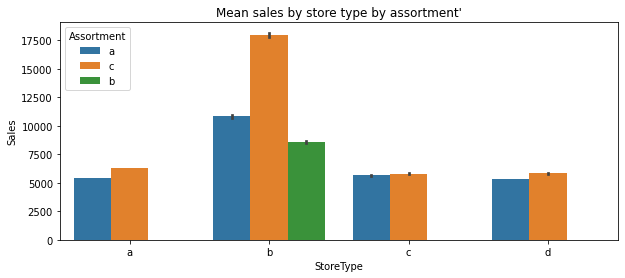

In [0]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='Customers', y='Sales', data=df_merge, hue='StoreType',fit_reg=False).set(title="Influence of sales on customers par store type")

plt.figure(figsize=(10,4))
sns.barplot(x='StoreType', y='Sales', data=df_merge,order=['a', 'b', 'c', 'd']).set(title="Sales per store type")

plt.figure(figsize=(10,4))
sns.barplot(x='Assortment', y='Sales', data=df_merge,order=['a', 'b', 'c']).set(title="Sales per Assortment")

plt.figure(figsize=(10,4))
sns.barplot(x='StoreType', y='Sales',hue='Assortment', data=df_merge,order=['a', 'b', 'c','d']).set(title="Mean sales by store type by assortment'")


### Influence of the date

In [0]:
df_merge['Date'] = pd.DatetimeIndex(df_merge['Date'])

In [0]:
df_merge['Day'] = df_merge['Date'].dt.day
df_merge['Month'] = df_merge['Date'].dt.month
df_merge['Year'] = df_merge['Date'].dt.year

[Text(0.5, 1.0, 'Sales per Year')]

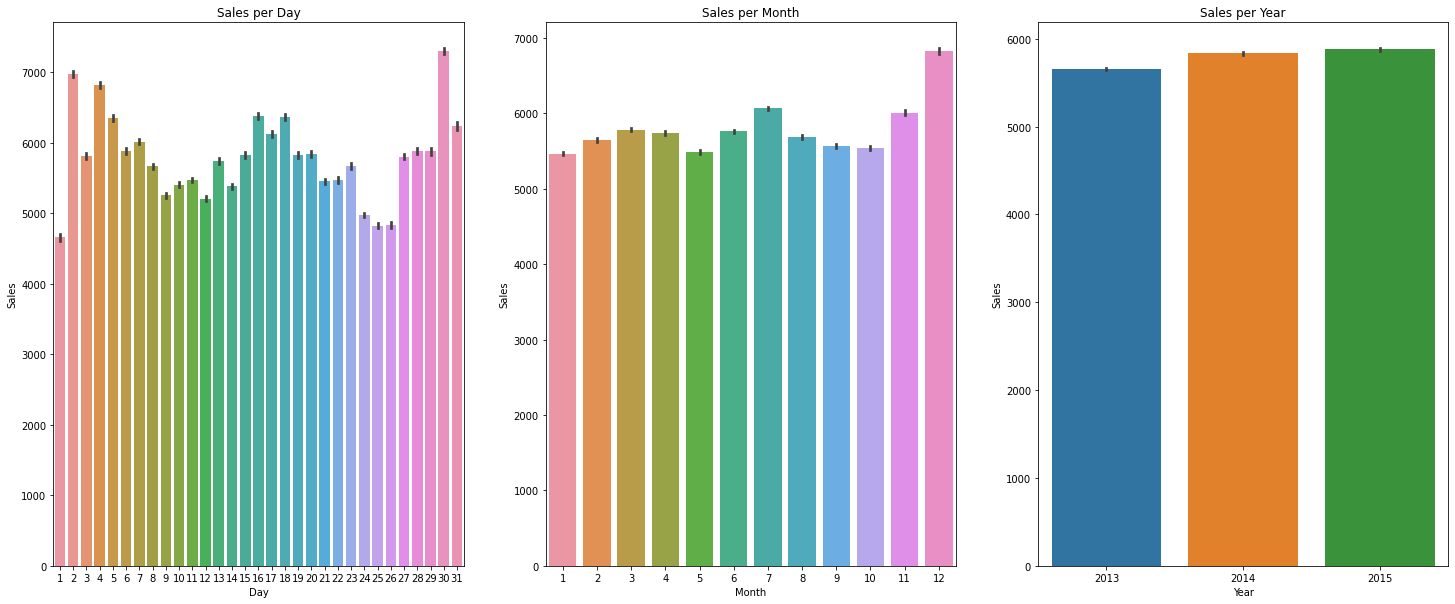

In [0]:
plt.figure(figsize=(25,10))
plt.subplot(1, 3, 1)
sns.barplot(df_merge["Day"],df_merge["Sales"]).set(title="Sales per Day")
plt.subplot(1, 3, 2)
sns.barplot(df_merge["Month"],df_merge["Sales"]).set(title="Sales per Month")
plt.subplot(1, 3, 3)
sns.barplot(df_merge["Year"],df_merge["Sales"]).set(title="Sales per Year")


### Influence of day of week 

[Text(0.5, 1.0, 'Customers per Day Of the Week')]

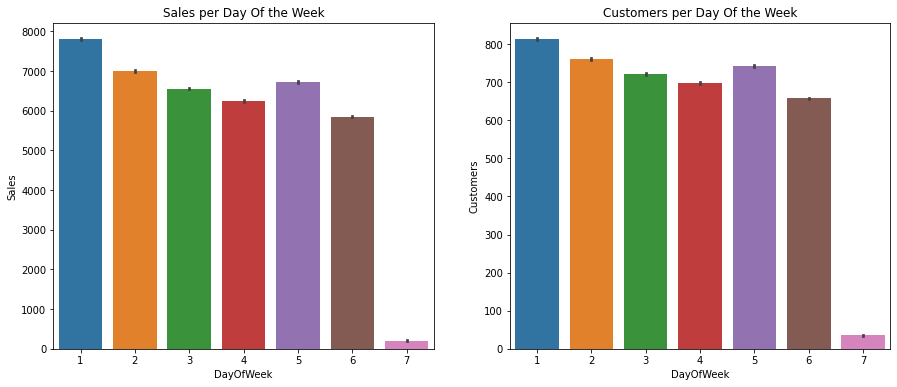

In [0]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(df_merge["DayOfWeek"],df_merge["Sales"]).set(title="Sales per Day Of the Week")

plt.subplot(1, 2, 2)
sns.barplot(df_merge["DayOfWeek"],df_merge["Customers"]).set(title="Customers per Day Of the Week")


[Text(0.5, 1.0, "Influence of Promotion on Number of customers for each store type'")]

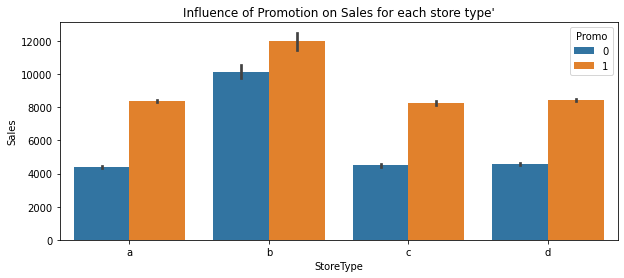

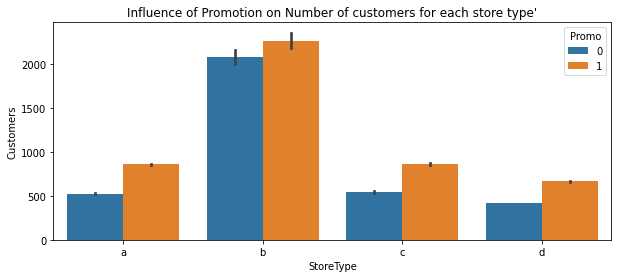

In [0]:
plt.figure(figsize=(10,4))
sns.barplot(x='StoreType', y='Sales',hue='Promo', data=df_merge,order=['a', 'b', 'c','d']).set(title="Influence of Promotion on Sales for each store type'")

plt.figure(figsize=(10,4))
sns.barplot(x='StoreType', y='Customers',hue='Promo', data=df_merge,order=['a', 'b', 'c','d']).set(title="Influence of Promotion on Number of customers for each store type'")

[Text(0.5, 1.0, "Influence of School holyday on number of customers for each store type'")]

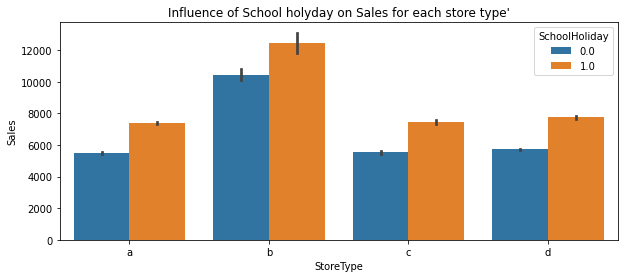

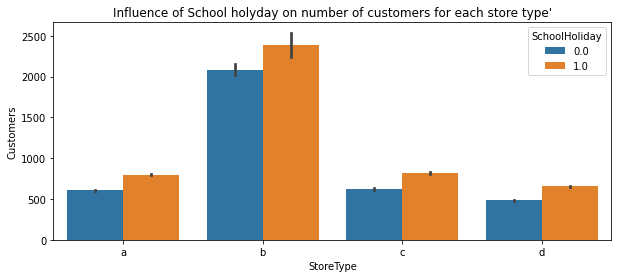

In [0]:
plt.figure(figsize=(10,4))
sns.barplot(x='StoreType', y='Sales',hue='SchoolHoliday', data=df_merge,order=['a', 'b', 'c','d']).set(title="Influence of School holyday on Sales for each store type'")

plt.figure(figsize=(10,4))
sns.barplot(x='StoreType', y='Customers',hue='SchoolHoliday', data=df_merge,order=['a', 'b', 'c','d']).set(title="Influence of School holyday on number of customers for each store type'")


### Avergage sale per persons

In [0]:
df_merge["sale per persons"]=df_merge['Sales'] / df_merge['Customers']


In [0]:
df_merge_type =df_merge.groupby('StoreType')['sale per persons'].mean()

In [0]:
df_merge_type=pd.DataFrame(df_merge_type)

In [0]:
df_merge_type.head()

,sale per persons
StoreType,
a,9.261083
b,5.235172
c,9.077263
d,11.835046


[Text(0.5, 1.0, 'Average sale by customers')]

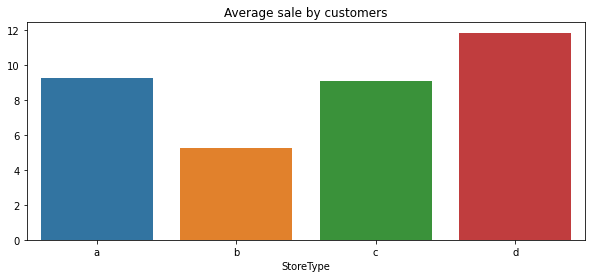

In [0]:
plt.figure(figsize=(10,4))
sns.barplot(x=df_merge_type.index, y=df_merge_type.values,order=['a', 'b', 'c','d']).set(title="Average sale by customers")
